<a href="https://colab.research.google.com/github/Mariapecker/ProyectosPython/blob/main/openai_visualizaciones_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizando embeddings

In [1]:
!pip install google-cloud-secret-manager google-auth google-auth-oauthlib openai mplcursors


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.2/208.2 kB 4.2 MB/s eta 0:00:00


#### Detalles del proyecto

In [3]:
import openai
from openai import OpenAI
from google.cloud import secretmanager
from google.colab import auth
auth.authenticate_user()
from google.colab import userdata
# Creamos un Cliente de SecretManager:
client = secretmanager.SecretManagerServiceClient()
secret_name = userdata.get('SECRET_NAME') # => Cambia por el nombre de tu secreto (en google cloud secret manager)
project_id = userdata.get('PROJECT_ID')
# Construye un F-string con los datos:
resource_name = f"projects/{project_id}/secrets/{secret_name}/versions/latest"

# REcupera tu secreto :
response = client.access_secret_version(request={"name": resource_name})
secret_string = response.payload.data.decode('UTF-8')

# Tu clave secreta queda bajo secret_string

# Configurar el motor de OpenAI
engine = "gpt-4-1106-preview"
client = OpenAI(api_key=secret_string)

def get_completion(prompt):
  completion = client.chat.completions.create(
  model=engine,
  messages=[
      {"role": "system", "content": "Eres un asistente, que realizas resúmenes concisos y proporcionas la ideas principales de un texto."},
      {"role": "user", "content": f"{prompt}"}
    ]
  )
  return completion

def get_embedding(text):
    response = client.embeddings.create(
        model="text-embedding-ada-002",
        input=text
    )
    # Obtener el embedding del primer elemento de la respuesta
    embedding = response.data[0].embedding
    return embedding

# Utilizar la función
texto = "jaguar"
embedding = get_embedding(texto)
print(embedding[:10])

MessageError: Error: credential propagation was unsuccessful

## Capturando significado con embeddings

In [ ]:
in_1 = "Hemos observado un ibis volando hacia la laguna"

in_2 = "Avistada una nutria en la costa"

in_3 = "Un perro parece divertirse con los delfines"


in_4 = "La ensalada de aguacate está deliciosa!"

in_5 = "Me encanta la comida japonesa!"


in_6 = "Los programadores de Python son gente genial"

in_7 = "TypeScript, C++ o Java? Todos molan!"


input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [ ]:
import numpy as np


- Obtenemos embeddings para todas las piezas de texto.
- Las almacenamos en un array NumPy 2D (una fila por cada embedding).

In [ ]:
embeddings = []
for input_text in input_text_lst_news:
    emb = get_embedding(input_text)
    embeddings.append(emb)

embeddings_array = np.array(embeddings)

In [ ]:
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

Shape: (7, 1536)
[[ 0.00057951 -0.00757264  0.01488089 ... -0.00715718 -0.00716347
   0.00643013]
 [-0.00440791 -0.00050377  0.01688899 ... -0.01141511 -0.00620693
   0.00013805]
 [-0.01861586 -0.0179559   0.01122555 ...  0.00127712 -0.00328424
   0.01158666]
 ...
 [-0.00871153 -0.00520119  0.01685944 ...  0.00151931  0.00097714
  -0.03070476]
 [ 0.00567186 -0.01846653  0.0122767  ... -0.0021748  -0.01746278
  -0.00727723]
 [-0.01544345 -0.01974076  0.01502715 ...  0.00575436  0.02060022
  -0.01775325]]


#### Reducimos de 768 a 2 dimensiones para visualizar
- Usamos principal component analysis (PCA).


In [ ]:
from sklearn.decomposition import PCA

# Hacemos PCA para 2D
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
dosD_values = PCA_model.transform(embeddings_array)

In [ ]:
print("Shape: " + str(dosD_values.shape))
print(dosD_values)

Shape: (7, 2)
[[ 0.28861198 -0.01989616]
 [ 0.28228418  0.00751363]
 [ 0.20686794 -0.08360217]
 [-0.09085929  0.31771641]
 [-0.22901814  0.24784254]
 [-0.18522245 -0.2457895 ]
 [-0.27266422 -0.22378475]]


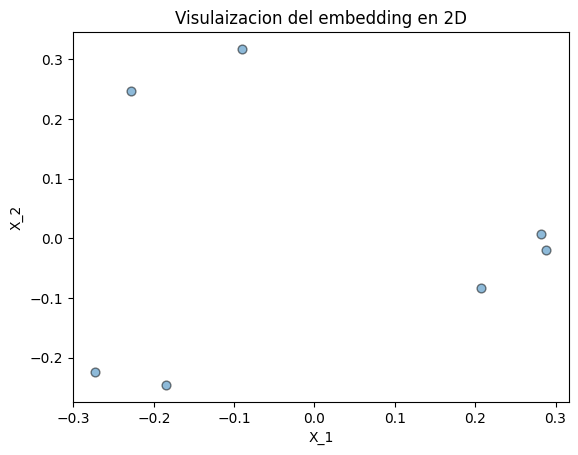

In [ ]:
import matplotlib.pyplot as plt
import mplcursors
def plot_2D(x_values, y_values, labels):

    # Creamos scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         alpha = 0.5,
                         edgecolors='k',
                         s = 40)

    # Creamos a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Visualización del embedding en 2D')
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
        sel.annotation.set_fontsize(12)

    plt.show()


plot_2D(dosD_values[:,0], dosD_values[:,1], input_text_lst_news)

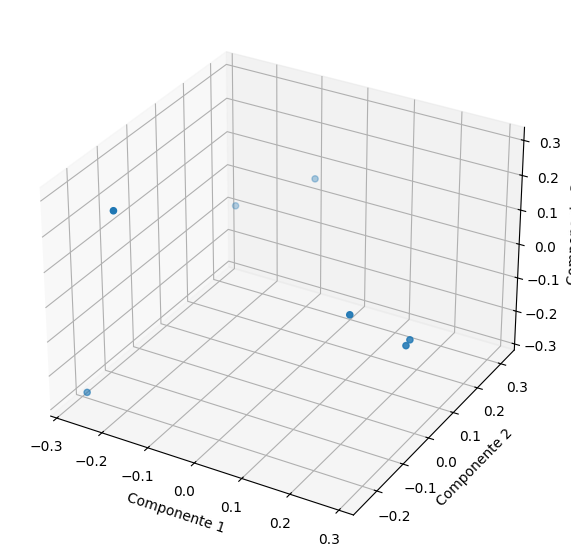

In [ ]:
# Perform PCA for 3D visualization
PCA_model = PCA(n_components = 3)
PCA_model.fit(embeddings_array)
embeddings_3d = PCA_model.transform(embeddings_array)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Supongamos que embeddings_3d es tu matriz de embeddings reducida a 3 dimensiones
x, y, z = embeddings_3d[:,0], embeddings_3d[:,1], embeddings_3d[:,2]
ax.scatter(x, y, z)

# Etiquetar los ejes (opcional)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def compare(embeddings,idx1,idx2):
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])

In [ ]:
print(in_1)
print(in_2)
print(compare(embeddings,0,1))

Hemos observado un ibis volando hacia la laguna
Avistada una nutria en la costa
[[0.87050027]]


In [ ]:
print(in_1)
print(in_4)
print(compare(embeddings,0,3))

Hemos observado un ibis volando hacia la laguna
La ensalada de aguacate está deliciosa!
[[0.78764224]]
